In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/Ozair/Downloads/sales_data.csv')

In [3]:
#discription
df

,Date,Category,Product,Quantity,Price
0,2023-01-01,Electronics,Laptop,2,800
1,2023-01-01,Electronics,Smartphone,5,400
2,2023-01-01,Books,Novel,3,20
3,2023-01-02,Books,Textbook,1,50
4,2023-01-02,Clothing,T-Shirt,10,15
...,...,...,...,...,...
70,2023-01-24,Electronics,Smartwatch,4,100
71,2023-01-24,Books,Novel,2,20
72,2023-01-25,Clothing,Shoes,3,80
73,2023-01-25,Books,Textbook,1,50


In [5]:
#dropping unecessary columns
df.drop(['Date'], axis=1, inplace=True)-

SyntaxError: invalid syntax (611565200.py, line 2)

In [26]:
#converting diagnosis into binary
# Create a mapping from 'B' to 0 and 'M' to 1
mapping = {'B': 0, 'M': 1}


In [27]:
#splitting the train and test data
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)#test size is 40% and train size is 60%

In [42]:
#Fitting the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [43]:
X_test_np = np.array(X_test)
# Convert predictions to 0s and 1s
prediction_binary = np.array([mapping[pred] for pred in prediction_knn])

print("Binary prediction for test set: {}".format(prediction_binary))

Binary prediction for test set: [0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 1 0 0 1 0]


In [44]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value': prediction_binary})
a.head()

,Actual value,Predicted value
204,B,0
70,M,1
131,M,1
431,B,0
540,B,0


Confusion Matrix:
[[145   3]
 [  9  71]]


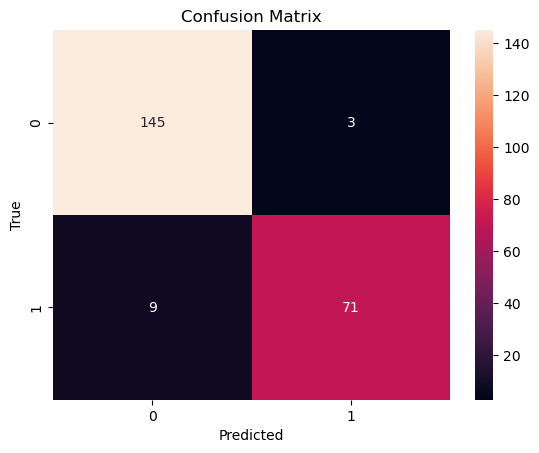

In [47]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print("Confusion Matrix:")
print(conf_matrix)

In [35]:
#implementing naive bayes classifier
nb = GaussianNB()
# Fit the Naive Bayes classifier to the training data
nb.fit(X_train, y_train)

GaussianNB()

In [38]:
#implementing decision tree
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree model:", accuracy)

Accuracy of the Decision Tree model: 0.9473684210526315


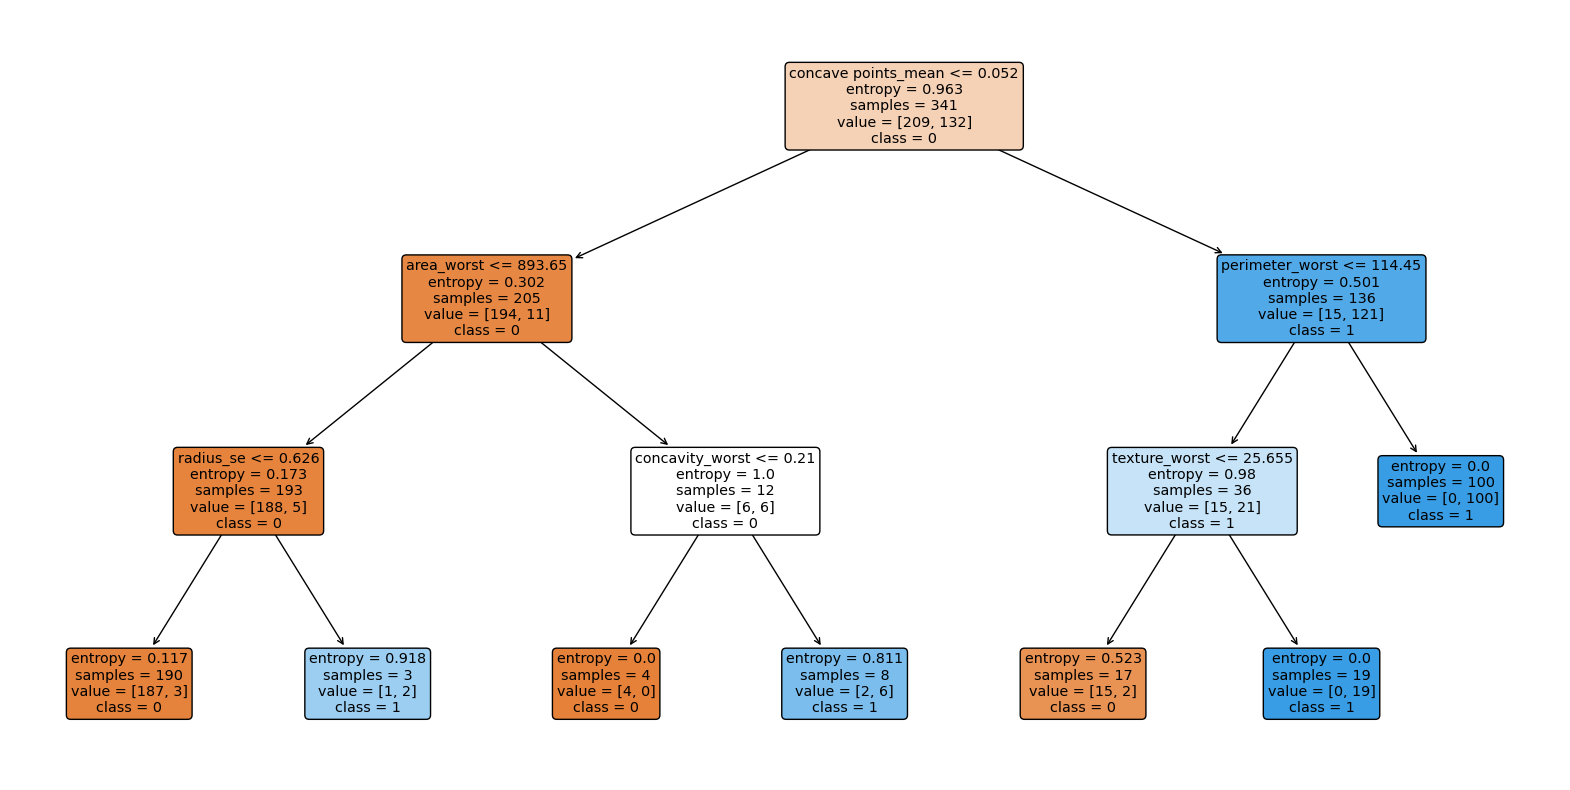

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
featurescol = list(X.columns)
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(classifier, feature_names=featurescol, class_names=['0', '1'], filled=True, rounded=True)
plt.savefig('data.png')  # Save the figure as an image
plt.show() 